In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import mysql.connector
import os
import matplotlib.pyplot as plt

In [3]:
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='asdfghjkl#123@',
    database='e_comm'
)
cur = db.cursor()

# problem solving


#1. List all unique cities where customers are located.

In [44]:
query = """select customer_city from olist_customers_dataset"""
cur.execute(query)


data = cur.fetchall()

df = pd.DataFrame(data ,columns=["customer_city"])
df.head(10)

,customer_city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,sao paulo
7,timoteo
8,curitiba
9,belo horizonte


#2. Count the number of orders placed in 2018.

In [7]:
query = """select count(order_id) from olist_order_items_dataset where year(shipping_limit_date)= 2018 """
cur.execute(query)


data = cur.fetchall()

data

[(62511,)]

#3. Find the total sales per category.

In [13]:
query = """select upper(olist_products_dataset.product_category_name) category ,
round( sum(olist_order_payments_dataset.payment_value),2) sales
from olist_products_dataset join olist_order_items_dataset
 on olist_products_dataset.product_id = olist_order_items_dataset.product_id
 join olist_order_payments_dataset
 on olist_order_payments_dataset.order_id = olist_order_items_dataset.order_id
 group by category
"""
cur.execute(query)


data = cur.fetchall()

data
df = pd.DataFrame(data ,columns =["category","sales"])
df

,category,sales
0,PERFUMARIA,506738.66
1,MOVEIS_DECORACAO,1430176.39
2,TELEFONIA,486882.05
3,FASHION_BOLSAS_E_ACESSORIOS,218158.28
4,CAMA_MESA_BANHO,1712553.67
...,...,...
69,CDS_DVDS_MUSICAIS,1199.43
70,LA_CUISINE,2913.53
71,FASHION_ROUPA_INFANTO_JUVENIL,785.67
72,PC_GAMER,2174.43


In [ ]:
Basic Queries
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.

#4. Calculate the percentage of orders that were paid in installments.


In [19]:
query = """select (sum(case when payment_installments>=1 then 1
else 0 end))/count(*)*100 from olist_order_payments_dataset
 
"""
cur.execute(query)


data = cur.fetchall()

data



[(Decimal('99.9981'),)]

#5. Count the number of customers from each state. 


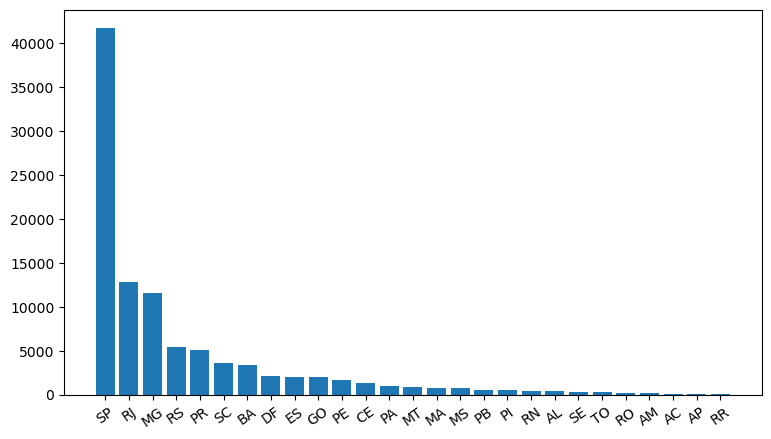

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5))
query = """select customer_state, count(customer_id)
from olist_customers_dataset group by customer_state"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns= ["customer_state","customer_count"])
df = df.sort_values(by = "customer_count",ascending=False)
plt.bar(df["customer_state"],df["customer_count"])
plt.xticks(rotation = 35)
plt.show()

#1. Calculate the number of orders per month in 2018.


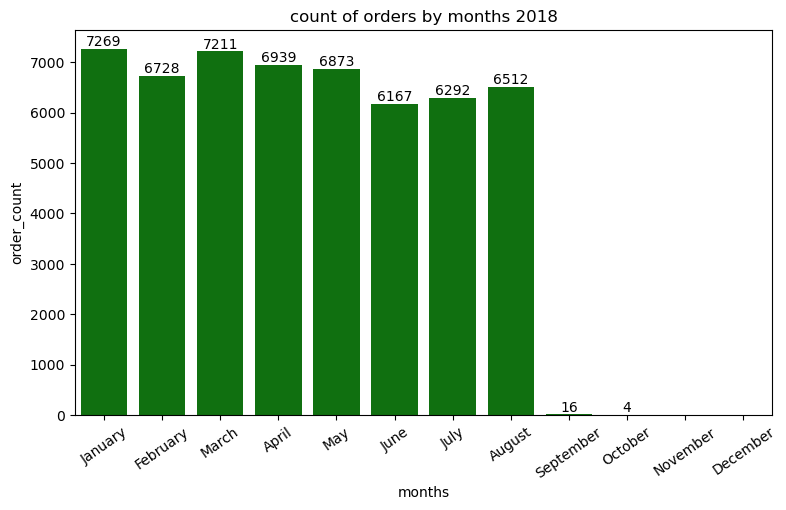

In [12]:
import seaborn as sns
query = """select monthname(order_purchase_timestamp) months, count(order_id) order_count
from olist_orders_dataset 
where year(order_purchase_timestamp) = 2018
group by months"""
cur.execute(query)


data = cur.fetchall()
plt.figure(figsize = (9,5))
plt.xticks(rotation = 35)
plt.xticks(rotation = 35)

df = pd.DataFrame(data ,columns=["months","order_count"])
o = ["January","February","March","April","May","June","July","August","September","October","November","December"]
ax = sns.barplot(x = df["months"],y = df["order_count"],data=df,order = o ,color ="green")
ax.bar_label(ax.containers[0])
plt.title("count of orders by months 2018")
plt.show()

#2. Find the average number of products per order, grouped by customer city.


In [7]:
query = """ with count_per_order as
(select olist_orders_dataset.order_id, olist_orders_dataset.customer_id, count(olist_order_items_dataset.order_id) as oc
from olist_orders_dataset join olist_order_items_dataset
on  olist_orders_dataset.order_id = olist_order_items_dataset.order_id
group by olist_orders_dataset.order_id, olist_orders_dataset.customer_id)

select olist_customers_dataset.customer_city, round(avg(count_per_order.oc),2) average_orders
from olist_customers_dataset join count_per_order
on olist_customers_dataset.customer_id = count_per_order.customer_id
group by olist_customers_dataset.customer_city order by average_orders desc

"""
cur.execute(query)


data = cur.fetchall()

df = pd.DataFrame(data ,columns = ["customer city", "average products/order"])
df.head(10)


,customer city,average products/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


#3. Calculate the percentage of total revenue contributed by each product category.


In [5]:
query = """ select upper(olist_products_dataset.product_category_name) category,
round(sum(olist_order_payments_dataset.payment_value)/(select sum(payment_value) from  olist_order_payments_dataset)*100,2) sales_percentage
from olist_products_dataset join olist_order_items_dataset
on olist_products_dataset.product_id = olist_order_items_dataset.product_id
join olist_order_payments_dataset
on olist_order_payments_dataset.order_id = olist_order_items_dataset.order_id
group by category order by sales_percentage desc
"""
cur.execute(query)


data = cur.fetchall()

df = pd.DataFrame(data ,columns = ["category", "percentage distribution"])
df


,category,percentage distribution
0,CAMA_MESA_BANHO,10.70
1,BELEZA_SAUDE,10.35
2,INFORMATICA_ACESSORIOS,9.90
3,MOVEIS_DECORACAO,8.93
4,RELOGIOS_PRESENTES,8.93
...,...,...
69,CASA_CONFORTO_2,0.01
70,CDS_DVDS_MUSICAIS,0.01
71,PC_GAMER,0.01
72,FASHION_ROUPA_INFANTO_JUVENIL,0.00


#4. Identify the correlation between product price and the number of times a product has been purchased.


In [11]:
import numpy as np
query = """ select olist_products_dataset.product_category_name,
count(olist_order_items_dataset.product_id),
round(avg(olist_order_items_dataset.price),2)
from olist_products_dataset join olist_order_items_dataset
on olist_products_dataset.product_id= olist_order_items_dataset.product_id
group by olist_products_dataset.product_category_name
"""
cur.execute(query)


data = cur.fetchall()

df = pd.DataFrame(data ,columns = ["category", "order_count","price"])
df
arr1 = df["order_count"]
arr2 = df["price"]
a = np.corrcoef([arr1,arr2])
print("the correlation between price  the number of times a product has been purchased is ",a[0][-1])

the correlation between price  the number of times a product has been purchased is  -0.10631514167157562


#5. Calculate the total revenue generated by each seller, and rank them by revenue.


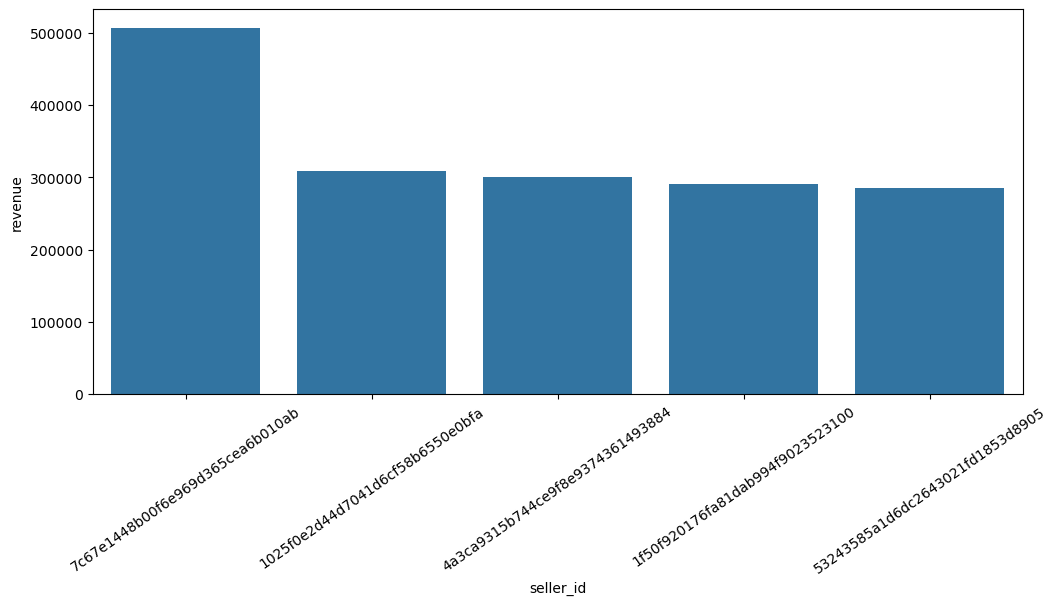

In [19]:
import seaborn as sns
query = """ select *,dense_rank() over(order by revenue desc) as rn
from
(select olist_order_items_dataset.seller_id, sum(olist_order_payments_dataset.payment_value)
revenue
from olist_order_items_dataset join olist_order_payments_dataset
on olist_order_items_dataset.order_id = olist_order_payments_dataset.order_id
group by olist_order_items_dataset.seller_id) as a
"""
cur.execute(query)


data = cur.fetchall()
plt.figure(figsize = (12,5))
plt.xticks(rotation = 35)
df = pd.DataFrame(data ,columns = ["seller_id", "revenue","rank"])
df =df.head()
sns.barplot(x = "seller_id",y = "revenue",data =df)
plt.show()

#1. Calculate the moving average of order values for each customer over their order history.


In [13]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select olist_orders_dataset.customer_id, olist_orders_dataset.order_purchase_timestamp, 
olist_order_payments_dataset.payment_value as payment
from olist_order_payments_dataset join olist_orders_dataset
on olist_order_payments_dataset.order_id = olist_orders_dataset.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


In [16]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(olist_orders_dataset.order_purchase_timestamp) as years,

month(olist_orders_dataset.order_purchase_timestamp) as months,
round(sum(olist_order_payments_dataset.payment_value),2) as payment
 from olist_orders_dataset join olist_order_payments_dataset
on olist_orders_dataset.order_id = olist_order_payments_dataset.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [17]:
query = """with a as(select year(olist_orders_dataset.order_purchase_timestamp) as years,
round(sum(olist_order_payments_dataset.payment_value),2) as payment from olist_orders_dataset join olist_order_payments_dataset
on olist_orders_dataset.order_id = olist_order_payments_dataset.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


In [19]:
query = """with a as (select olist_customers_dataset.customer_id,
min(olist_orders_dataset.order_purchase_timestamp) first_order
from olist_customers_dataset join olist_orders_dataset
on olist_customers_dataset.customer_id = olist_orders_dataset.customer_id
group by olist_customers_dataset.customer_id),

b as (select a.customer_id, count(distinct olist_orders_dataset.order_purchase_timestamp) next_order
from a join olist_orders_dataset
on olist_orders_dataset.customer_id = a.customer_id
and olist_orders_dataset.order_purchase_timestamp > first_order
and olist_orders_dataset.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

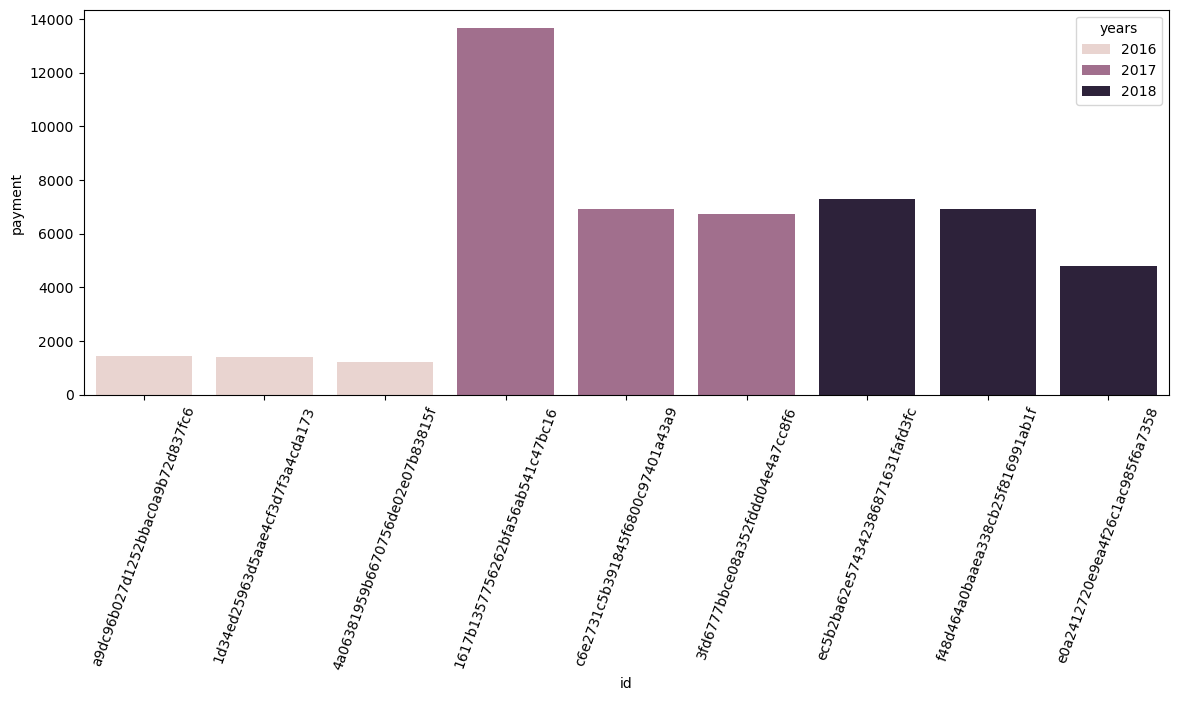

In [28]:
query = """select years, customer_id, payment, d_rank
from
(select year(olist_orders_dataset.order_purchase_timestamp) years,
olist_orders_dataset.customer_id,
sum(olist_order_payments_dataset.payment_value) payment,
dense_rank() over(partition by year(olist_orders_dataset.order_purchase_timestamp)
order by sum(olist_order_payments_dataset.payment_value) desc) d_rank
from olist_orders_dataset join olist_order_payments_dataset
on olist_order_payments_dataset.order_id = olist_orders_dataset.order_id
group by year(olist_orders_dataset.order_purchase_timestamp),
olist_orders_dataset.customer_id) as a
where d_rank <= 3 """

cur.execute(query)
data = cur.fetchall()
plt.figure(figsize = (14,5))
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 70)
plt.show()